# Panimula sa Probabilidad at Estadistika
Sa notebook na ito, mag-eeksperimento tayo sa ilang mga konsepto na napag-usapan na natin dati. Maraming konsepto mula sa probabilidad at estadistika ang mahusay na naipapakita sa mga pangunahing library para sa pagproseso ng datos sa Python, tulad ng `numpy` at `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Mga Random na Variable at Distribusyon  
Magsimula tayo sa pagkuha ng sample na may 30 halaga mula sa isang uniform na distribusyon mula 0 hanggang 9. Kalkulahin din natin ang mean at variance.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Upang tantyahin nang biswal kung ilang iba't ibang halaga ang nasa sample, maaari nating i-plot ang **histogram**:


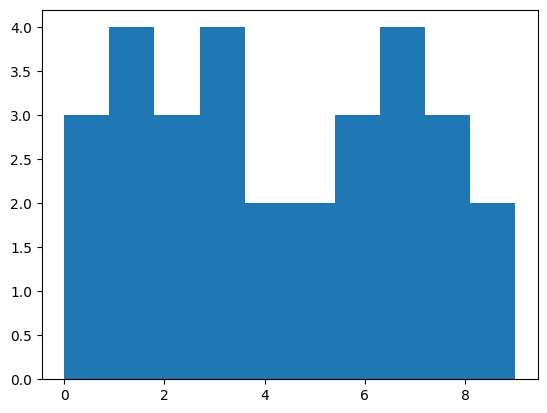

In [119]:
plt.hist(sample)
plt.show()

## Pagsusuri ng Totoong Datos

Ang mean at variance ay napakahalaga kapag sinusuri ang datos mula sa totoong mundo. Mag-load tayo ng datos tungkol sa mga manlalaro ng baseball mula sa [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Gumagamit tayo ng package na tinatawag na [**Pandas**](https://pandas.pydata.org/) dito para sa pagsusuri ng datos. Pag-uusapan pa natin ang tungkol sa Pandas at ang paggamit ng datos sa Python sa mga susunod na bahagi ng kursong ito.

Ngayon, kalkulahin natin ang mga karaniwang halaga para sa edad, taas, at timbang:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Ngayon, mag-focus tayo sa taas, at kalkulahin ang standard deviation at variance:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Bilang karagdagan sa mean, makatuwiran ding tingnan ang median na halaga at mga quartile. Maaari itong maipakita gamit ang isang **box plot**:


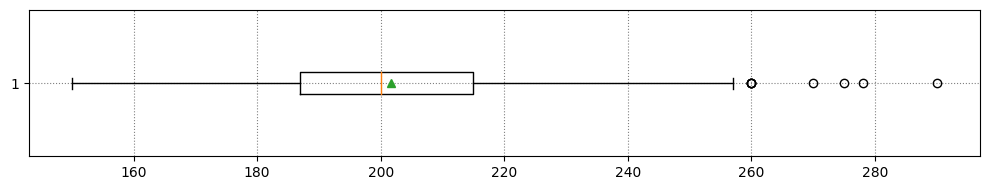

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Maaari rin tayong gumawa ng mga box plot ng mga subset ng ating dataset, halimbawa, naka-grupo ayon sa papel ng manlalaro.


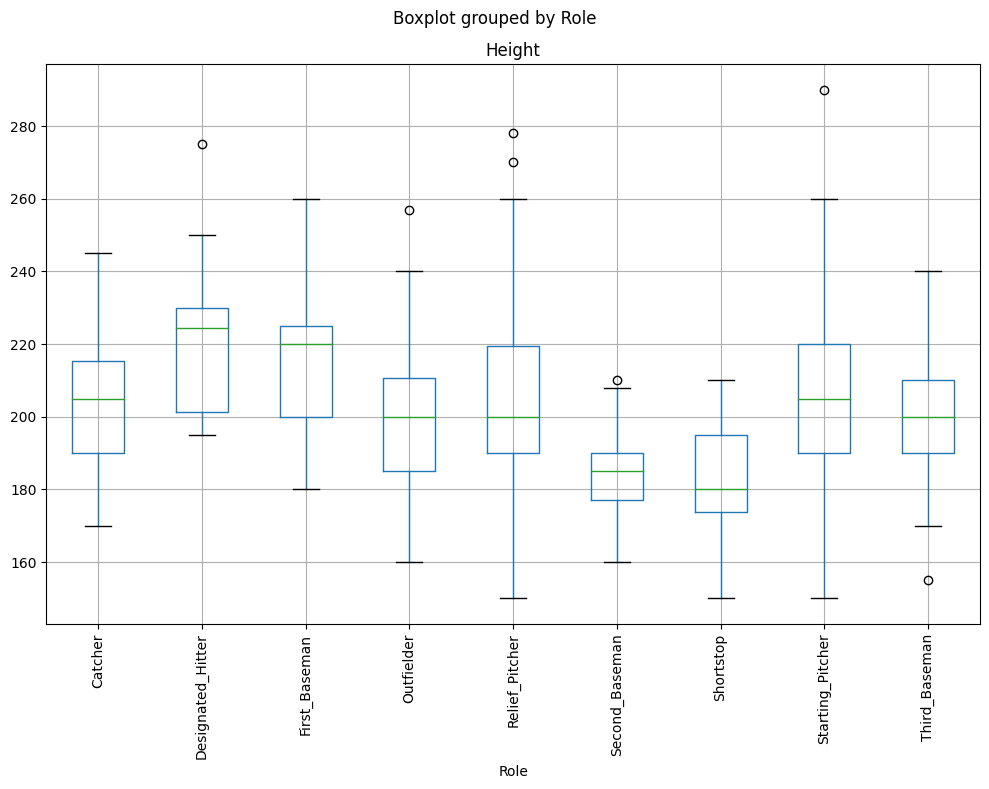

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Tandaan**: Ipinapakita ng diagram na ito na, sa karaniwan, ang taas ng mga first basemen ay mas mataas kaysa sa taas ng mga second basemen. Sa mga susunod na bahagi, matututunan natin kung paano mas pormal na masusubukan ang hypothesis na ito, at kung paano maipapakita na ang ating datos ay may estadistikal na kabuluhan upang patunayan ito.

Ang edad, taas, at timbang ay pawang mga tuloy-tuloy na random na variable. Ano sa tingin mo ang distribusyon ng mga ito? Isang magandang paraan upang malaman ay ang pag-plot ng histogram ng mga halaga:


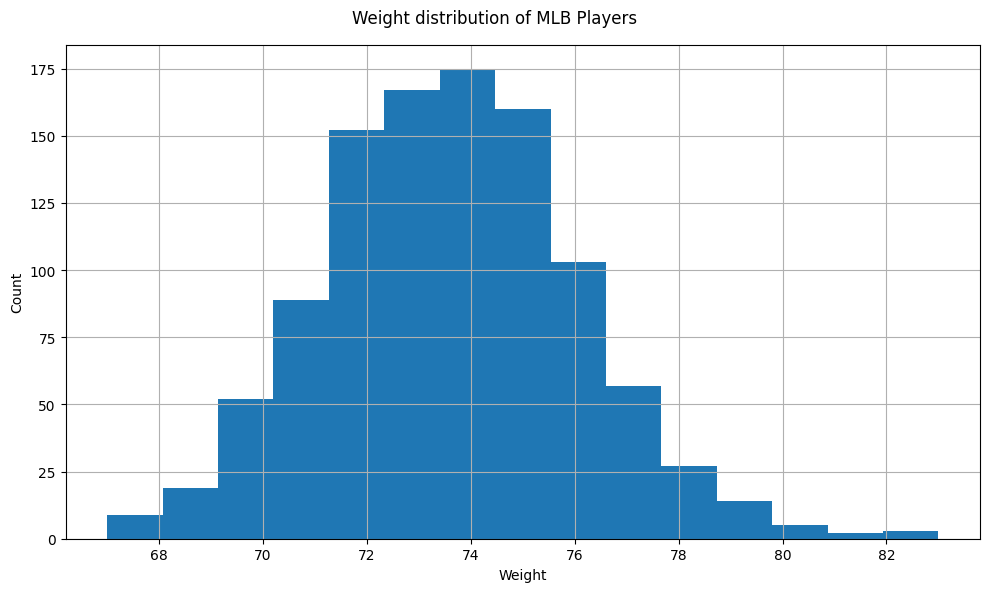

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normal Distribution

Gumawa tayo ng artipisyal na sample ng mga timbang na sumusunod sa normal na distribusyon na may parehong mean at variance tulad ng sa ating totoong datos:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

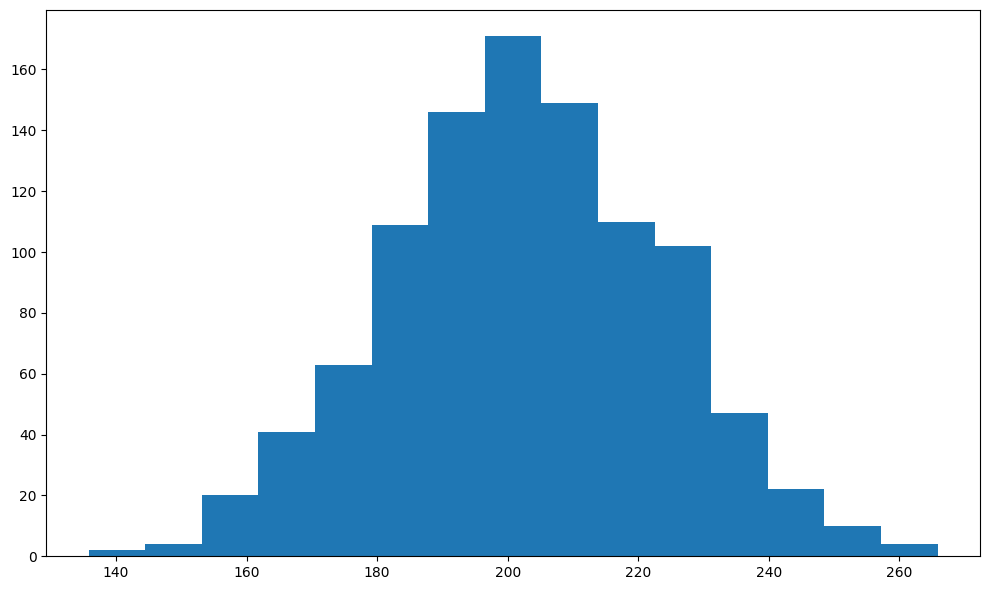

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

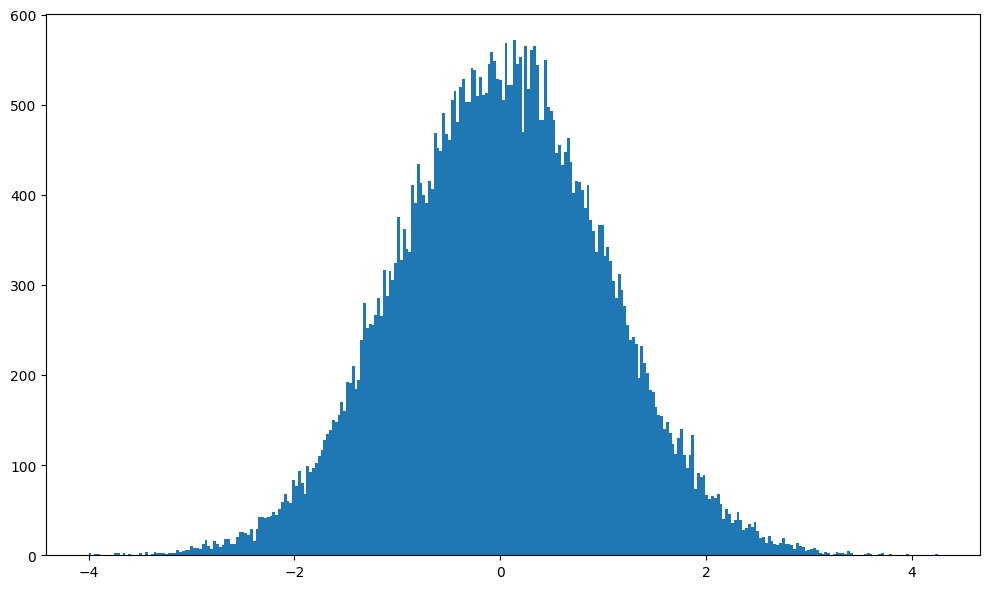

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Dahil karamihan sa mga halaga sa totoong buhay ay karaniwang may normal na distribusyon, hindi natin dapat gamitin ang isang uniform random number generator upang makabuo ng sample na datos. Narito ang mangyayari kung susubukan nating bumuo ng mga timbang gamit ang isang uniform na distribusyon (na binuo gamit ang `np.random.rand`):


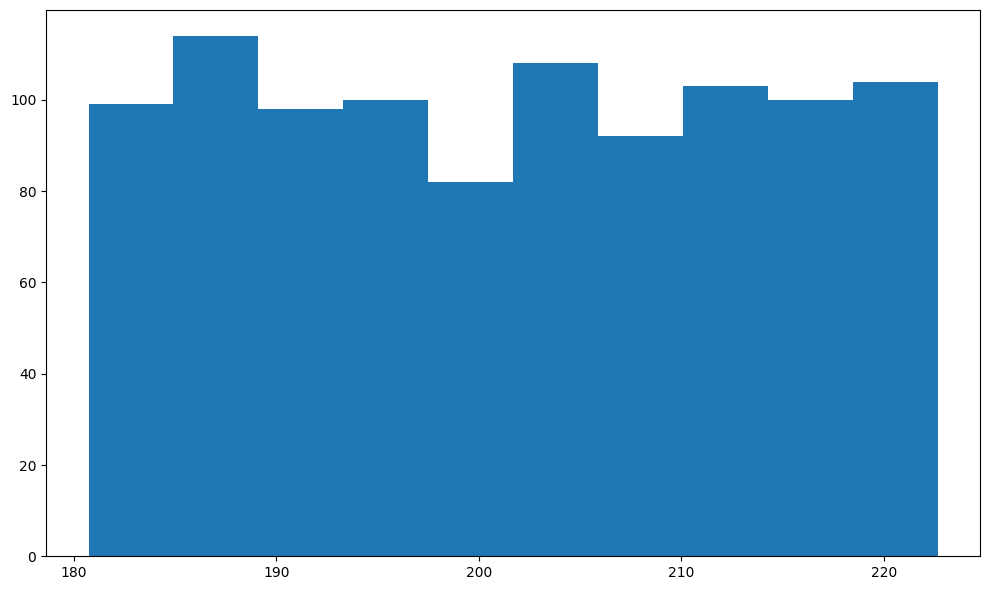

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Mga Interval ng Kumpiyansa

Ngayon, kalkulahin natin ang mga interval ng kumpiyansa para sa mga timbang at taas ng mga manlalaro ng baseball. Gagamitin natin ang code [mula sa talakayan sa stackoverflow na ito](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Pagsusuri ng Hipotesis

Tuklasin natin ang iba't ibang papel sa ating dataset ng mga manlalaro ng baseball:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Makikita natin na ang mga pagitan ay hindi nag-o-overlap.

Isang mas estadistikal na tamang paraan upang patunayan ang hypothesis ay ang paggamit ng **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Ang dalawang halagang ibinabalik ng `ttest_ind` function ay:  
* Ang p-value ay maituturing na posibilidad na ang dalawang distribusyon ay may parehong mean. Sa ating kaso, ito ay napakababa, na nangangahulugang may malakas na ebidensiya na sumusuporta sa ideya na mas matangkad ang mga first basemen.  
* Ang t-value ay ang pansamantalang halaga ng normalisadong pagkakaiba ng mean na ginagamit sa t-test, at ito ay ikinukumpara sa isang threshold value para sa isang tiyak na antas ng kumpiyansa.  


## Pagsasagawa ng Normal na Pamamahagi gamit ang Central Limit Theorem

Ang pseudo-random generator sa Python ay idinisenyo upang magbigay sa atin ng pantay na pamamahagi. Kung nais nating lumikha ng generator para sa normal na pamamahagi, maaari nating gamitin ang central limit theorem. Upang makakuha ng normal na ipinamamahaging halaga, kukunin lamang natin ang mean ng isang sample na nabuo mula sa pantay na pamamahagi.


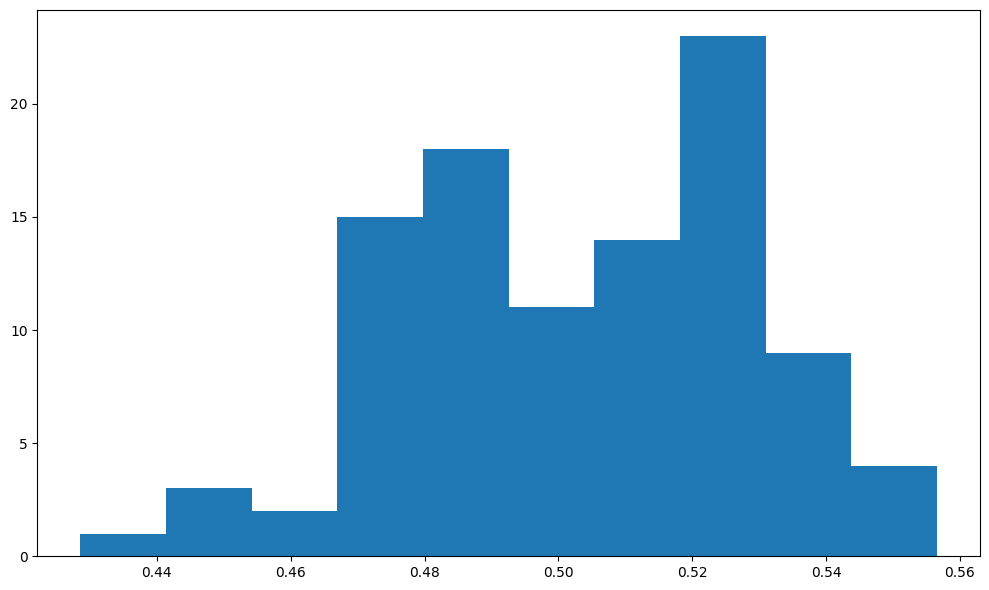

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelasyon at Masamang Baseball Corp

Ang korelasyon ay nagbibigay-daan sa atin upang matukoy ang ugnayan sa pagitan ng mga hanay ng datos. Sa ating simpleng halimbawa, magkunwari tayo na may isang masamang korporasyon ng baseball na nagbabayad sa kanilang mga manlalaro batay sa kanilang tangkad - mas matangkad ang manlalaro, mas malaki ang bayad na natatanggap niya. Ipagpalagay na may base na sahod na $1000, at isang karagdagang bonus mula $0 hanggang $100, depende sa tangkad. Kukunin natin ang totoong mga manlalaro mula sa MLB, at kakalkulahin ang kanilang imahinaryong mga sahod:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Ngayon, kalkulahin natin ang covariance at correlation ng mga sequence na iyon. Ang `np.cov` ay magbibigay sa atin ng tinatawag na **covariance matrix**, na isang pagpapalawig ng covariance sa maraming variable. Ang elemento $M_{ij}$ ng covariance matrix $M$ ay isang correlation sa pagitan ng mga input variable na $X_i$ at $X_j$, at ang mga diagonal na halaga $M_{ii}$ ay ang variance ng $X_{i}$. Sa parehong paraan, ang `np.corrcoef` ay magbibigay sa atin ng **correlation matrix**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


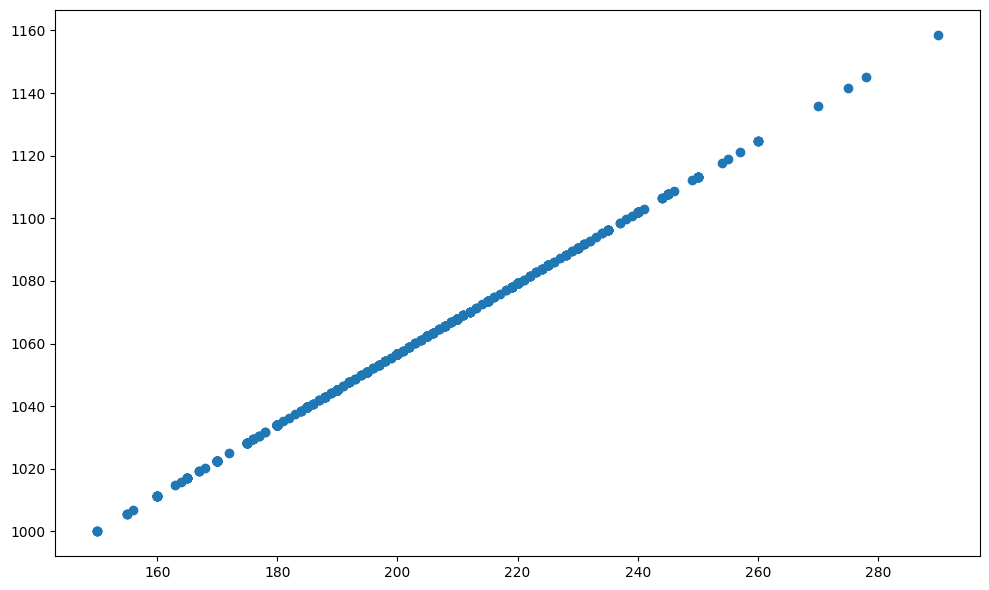

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Sa kasong ito, ang ugnayan ay bahagyang mas maliit, ngunit ito ay nananatiling medyo mataas. Ngayon, upang gawing mas hindi halata ang relasyon, maaaring gusto nating magdagdag ng kaunting karagdagang randomness sa pamamagitan ng pagdaragdag ng ilang random na variable sa sahod. Tingnan natin kung ano ang mangyayari:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


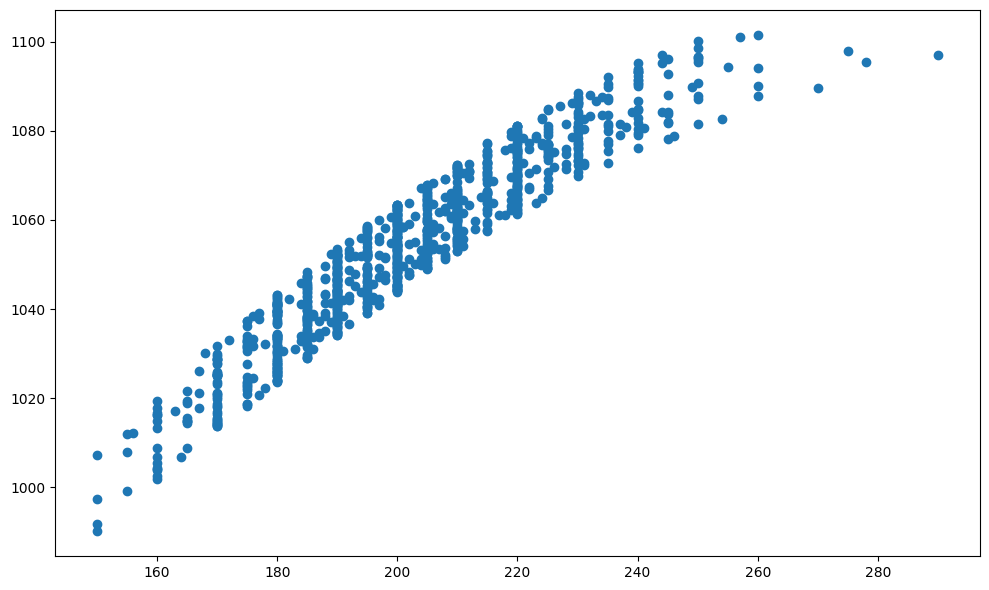

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Alam mo ba kung bakit ang mga tuldok ay nagkakahanay sa patayong linya nang ganito?

Napansin namin ang ugnayan sa pagitan ng isang artipisyal na konsepto tulad ng sahod at ng naobserbahang variable na *taas*. Tingnan din natin kung ang dalawang naobserbahang variable, tulad ng taas at timbang, ay may ugnayan:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Sa kasamaang-palad, wala tayong nakuha kahit anong resulta - tanging ilang kakaibang `nan` na halaga lamang. Ito ay dahil ang ilan sa mga halaga sa ating serye ay hindi natukoy, na kinakatawan bilang `nan`, na nagiging sanhi upang ang resulta ng operasyon ay maging hindi rin natukoy. Sa pagtingin sa matrix, makikita natin na ang `Weight` ang may problema, dahil ang self-correlation sa pagitan ng mga halaga ng `Height` ay na-compute.

> Ipinapakita ng halimbawang ito ang kahalagahan ng **paghahanda ng datos** at **paglilinis**. Kung walang maayos na datos, wala tayong maikukuwenta.

Gamitin natin ang `fillna` na pamamaraan upang punan ang mga nawawalang halaga, at i-compute ang correlation:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

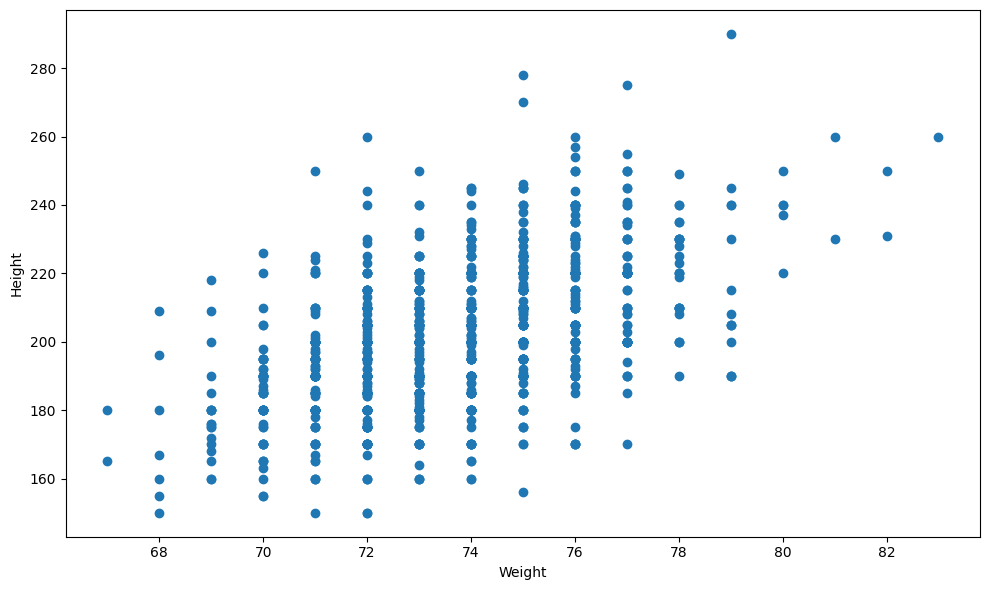

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Konklusyon

Sa notebook na ito, natutunan natin kung paano magsagawa ng mga pangunahing operasyon sa datos upang makalkula ang mga estadistikal na function. Alam na natin kung paano gamitin ang maayos na kasangkapan ng matematika at estadistika upang patunayan ang ilang mga hypothesis, at kung paano kalkulahin ang confidence intervals para sa mga arbitraryong variable gamit ang isang sample ng datos.



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa kanyang orihinal na wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na maaaring magmula sa paggamit ng pagsasaling ito.
